In [71]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [72]:
# Open Dataset

df = pd.read_csv('/home/jovyan/workspace/data/vendas_sao_paulo.csv')
df.head()

,data,temp,vendas,day,month,year,hour,morning,afternoon,nigth,dawn,tempMean,tempMorningMean,tempAfternoonMean,tempNigthMean,totalSales,tempDawnMean
0,2016-01-01 00:00:00,23.8,14.209238,1,1,2016,0,0,0,0,1,21.537097,NaN,NaN,NaN,9968.195728,19.84086
1,2016-01-01 01:00:00,23.0,13.958287,1,1,2016,1,0,0,0,1,21.537097,NaN,NaN,NaN,9968.195728,19.84086
2,2016-01-01 02:00:00,22.5,13.716768,1,1,2016,2,0,0,0,1,21.537097,NaN,NaN,NaN,9968.195728,19.84086
3,2016-01-01 03:00:00,22.2,13.634776,1,1,2016,3,0,0,0,1,21.537097,NaN,NaN,NaN,9968.195728,19.84086
4,2016-01-01 04:00:00,21.7,13.473862,1,1,2016,4,0,0,0,1,21.537097,NaN,NaN,NaN,9968.195728,19.84086


## 2. Análise Gráfica

### (a) Gráfico de barras com a vendas totais mensais entre 2016 e 2018

In [73]:
salesMonth = pd.DataFrame({'salesMonth' : df[(df['year'] >= 2016) & (df['year'] <= 2018)].groupby(['month','year'])['vendas'].sum()}).reset_index()
month = {1:'Janeiro',2:'Fevereiro',3:'Março',4:'Abril',5:'Maio',6:'Junho',7:'Julho',8:'Agosto',9:'Setembro',10:'Outubro',11:'Novembro',12:'Dezembro'}

salesMonth.replace(month,inplace = True)

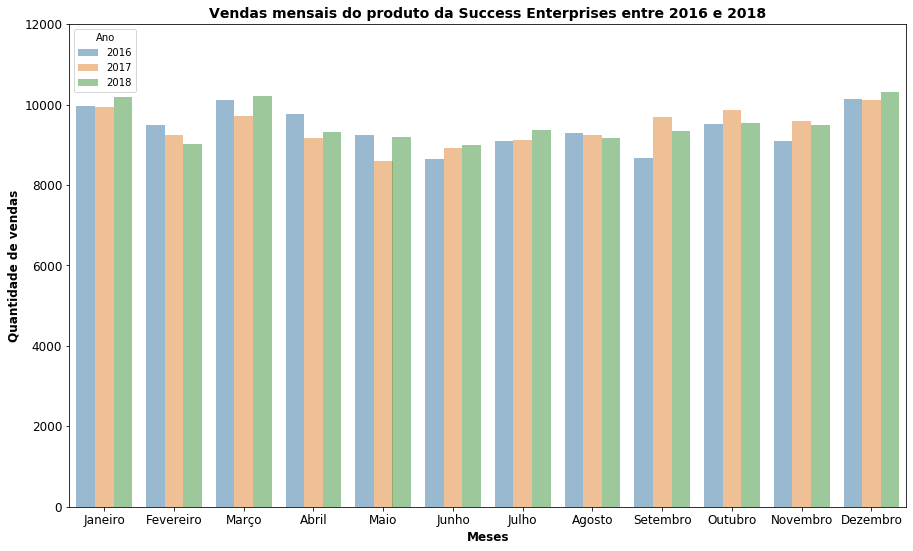

In [74]:
fig, ax = plt.subplots()
sns.barplot(x="month", y="salesMonth", hue="year", data=salesMonth, alpha = 0.5);
plt.title('Vendas mensais do produto da Success Enterprises entre 2016 e 2018', fontsize = 14, fontweight = 'bold')
plt.ylabel('Quantidade de vendas', fontsize = 12, fontweight = 'bold');
plt.xlabel('Meses', fontsize = 12, fontweight = 'bold');
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.ylim(0,12000);
plt.legend(title = 'Ano')
fig.set_size_inches(15, 8.88);

### (b) Gráfico de linhas com todo o histórico mensal das temperaturas médias mensais

In [75]:
tempMonth = pd.DataFrame({'tempMonth' : df.groupby(['month','year'])['temp'].mean()}).reset_index()
tempMonth.replace(month,inplace = True)
tempMonth.rename(columns = {'year':'Ano'}, inplace = True)

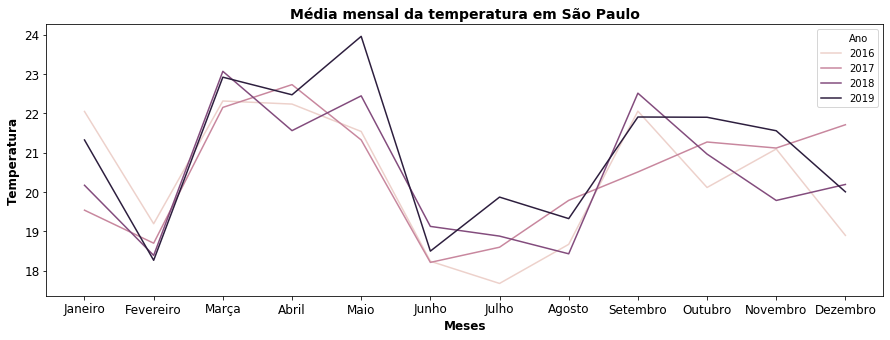

In [76]:
fig, ax = plt.subplots()
sns.lineplot(x="month", y="tempMonth", hue="Ano", data=tempMonth);
plt.title('Média mensal da temperatura em São Paulo', fontsize = 14, fontweight = 'bold')
plt.ylabel('Temperatura', fontsize = 12, fontweight = 'bold');
plt.xlabel('Meses', fontsize = 12, fontweight = 'bold');
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
ax.set_xticklabels(['Janeiro','Fevereiro','Marça','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'])
fig.set_size_inches(15, 5);

### (c) Use sua criatividade e construa outras visualizações que possam ser interessantes

In [77]:
tempMonth = df.copy()
tempMonth['month'].replace(month,inplace = True)

In [85]:
salesMonth = pd.DataFrame({'salesMonth' : df.groupby(['month'])['vendas'].sum()}).reset_index()
salesMonth.replace(month,inplace = True)

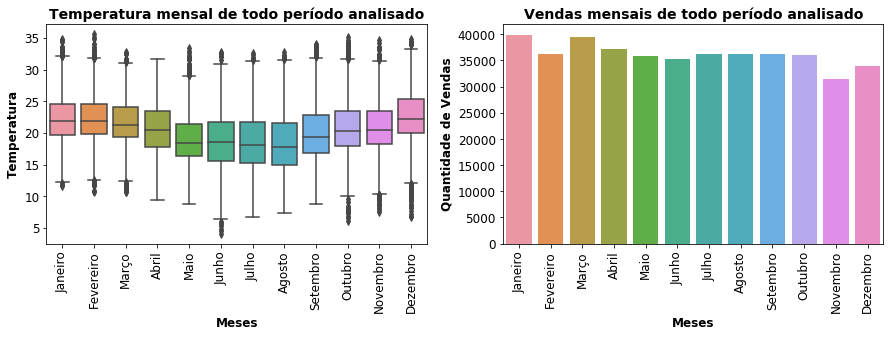

In [130]:
fig, ax = plt.subplots()
plt.subplot(2, 2, 1)
sns.boxplot(x="month", y="temp", data=tempMonth);
plt.title('Temperatura mensal de todo período analisado', fontsize = 14, fontweight = 'bold')
plt.ylabel('Temperatura', fontsize = 12, fontweight = 'bold');
plt.xlabel('Meses', fontsize = 12, fontweight = 'bold');
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=90)
fig.set_size_inches(15, 8.88);

plt.subplot(2, 2, 2)
sns.barplot(x="month", y="salesMonth", data=salesMonth);
plt.title('Vendas mensais de todo período analisado', fontsize = 14, fontweight = 'bold')
plt.ylabel('Quantidade de Vendas', fontsize = 12, fontweight = 'bold');
plt.xlabel('Meses', fontsize = 12, fontweight = 'bold');
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=90)
fig.set_size_inches(15, 8.88);

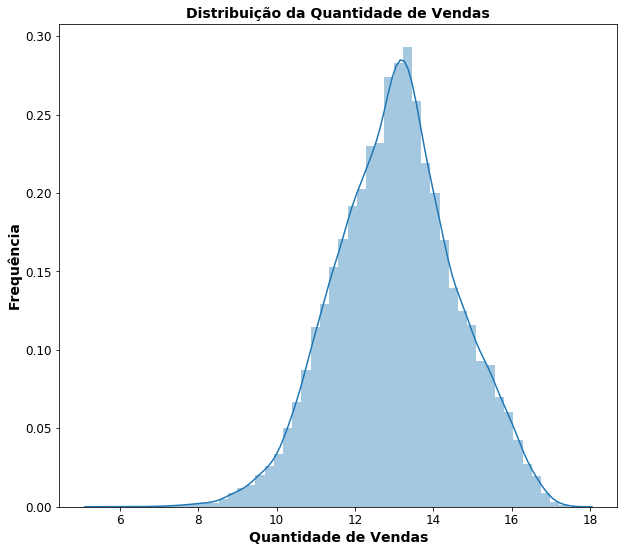

In [116]:
fig, ax = plt.subplots()
sns.distplot(df['vendas'].dropna());
plt.title('Distribuição da Quantidade de Vendas', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequência', fontsize = 14, fontweight = 'bold');
plt.xlabel('Quantidade de Vendas', fontsize = 14, fontweight = 'bold');
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
fig.set_size_inches(10, 8.88);